# Let's buy groceries

0. Import usual librairies

In [2]:
import numpy as np
import pandas as pd
# Import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

1. Download the `customer.csv` dataset

In [3]:
dataset = pd.read_csv("src/customers.csv")

dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


2. Delete dataset's qualitatives variables

In [4]:
dataset.drop(["Channel", "Region"], axis = 1, inplace = True)

In [5]:
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


3. Keep only `Grocery` and `Milk` columns

In [6]:
dataset = dataset[['Grocery', "Milk"]]

4. Visualise datas via scatter plot

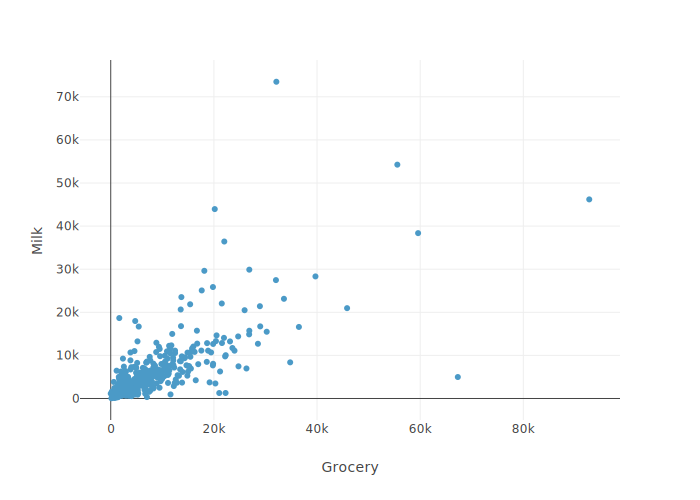

In [7]:
fig = px.scatter(dataset, 'Grocery', 'Milk')
fig.show()

5. Standardize datas

In [8]:
from sklearn.preprocessing import StandardScaler
sc_df = StandardScaler().fit(dataset)
dataset = sc_df.transform(dataset)

6. Define an instance of DBSCAN with the parameters eps = .5,
min_samples = 15

In [9]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(dataset)

7. Create a dbscan_predict object that contains the classes defined by DBSCAN

In [10]:
dbsc_predict = dbsc.fit_predict(dataset)

8. Visualize the data by coloring the points according to the class found by DBSCAN

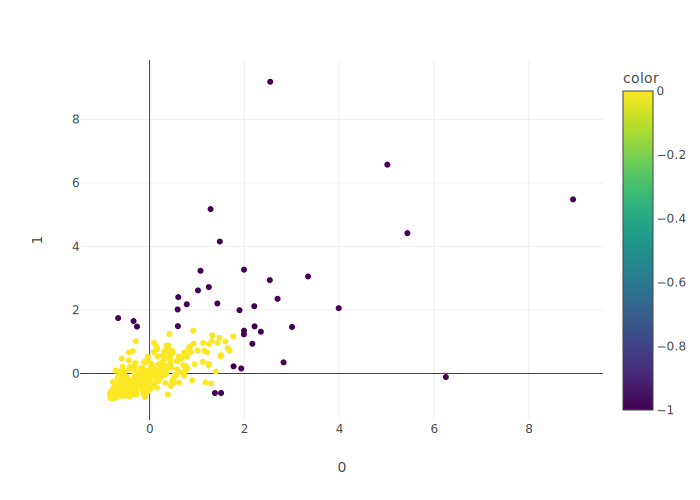

In [14]:
fig = px.scatter(dataset, x = 0, y = 1, color = dbsc_predict)
fig.show()